# Exploration & analysis of data and answering important questions

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#path import
path = r'C:\Users\guzic\Contacts\Instacart Grocery Basket Analysis'

In [3]:
# pickel file import

ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepped Data', 'ords_prods_cust_merged.pkl'))

In [4]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,dependants,fam_status,income
0,2539329,1,1,2,8,100000,196,1,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
ords_prods_cust_merge.shape

(32404859, 33)

In [6]:
ords_prods_cust_merge['prices'].max()

99999.0

In [4]:
# add exclusion flag

ords_prods_cust_merge.loc[ords_prods_cust_merge['prices'] >100, 'prices'] = np.nan

In [5]:
ords_prods_cust_merge['prices'].max()

25.0

In [9]:
# Command for copying and pasting cross tab into an excel document: 

##  crosstab.to_clipboard()

In [10]:
# 2 - Consider any security implications that might exist for this new data. 
# You’ll need to address any PII data in the data before continuing your 
# analysis.

In [11]:
# The data includes people's first and last names, those need to be dropped/removed

In [6]:
# removing the 'first_name' & 'last_name'columns

ords_prods_cust_merge = ords_prods_cust_merge.drop(columns = ['first_name', 'last_name'])

In [13]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,spending_flag,frequency_customer,frequency_flag,gender,state,age,date_joined,dependants,fam_status,income
0,2539329,1,1,2,8,100000,196,1,0,both,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
ords_prods_cust_merge.shape

(32404859, 31)

In [156]:
# Creating a For-Loop for regions & creating region column

In [8]:
region = []
for value in ords_prods_cust_merge['state']:
  if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
    region.append('Northeast')
  elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Minnesota', 'Iowa', 'Missouri']):
    region.append('Midwest')
  elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
    region.append('South')
  else:
    region.append('West')

In [18]:
# running loop

region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'Wes

In [9]:
# combining with ords_prods_cust_merge dataset & creating column

ords_prods_cust_merge['region'] = region

In [10]:
# Frequency/Value Count Check

ords_prods_cust_merge['region'].value_counts(dropna = False)

South        10791885
West          9557733
Midwest       6332505
Northeast     5722736
Name: region, dtype: int64

In [21]:
# flag check

ords_prods_cust_merge[['region', 'state']].head(20)

,region,state
0,South,Alabama
1,South,Alabama
2,South,Alabama
3,South,Alabama
4,South,Alabama
5,South,Alabama
6,South,Alabama
7,South,Alabama
8,South,Alabama
9,South,Alabama


In [22]:
# spendng habits by region

In [23]:
ords_prods_cust_merge.groupby('region')['spending_flag'].value_counts()

region     spending_flag
Midwest    Low spender       6204849
           High spender       127656
Northeast  Low spender       5614511
           High spender       108225
South      Low spender      10582194
           High spender       209691
West       Low spender       9369060
           High spender       188673
Name: spending_flag, dtype: int64

In [24]:
# Looking at the numbers, the South region has the highest amount of high-spenders

In [25]:
crosstab = pd.crosstab(ords_prods_cust_merge['region'], ords_prods_cust_merge['spending_flag'], dropna = False)

In [26]:
# Copy and paste into new excel

crosstab.to_clipboard()

# adding activy_flag & removing Not Active from dataframe

In [11]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] >= 5, 'activity_flag'] = 'Active'

In [12]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] < 5, 'activity_flag'] = 'Not Active'

In [29]:
# run checks

In [30]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,frequency_flag,gender,state,age,date_joined,dependants,fam_status,income,region,activity_flag
0,2539329,1,1,2,8,100000,196,1,0,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
2,473747,1,3,3,12,21.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Active
4,431534,1,5,4,15,28.0,196,1,1,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Active


In [13]:
ords_prods_cust_merge['activity_flag'].value_counts(dropna = False)

Active        30964564
Not Active     1440295
Name: activity_flag, dtype: int64

In [32]:
# create and export the not active clients into an excel

low_activity_custs = ords_prods_cust_merge[ords_prods_cust_merge['activity_flag']=='Not Active']

In [33]:
# check to make sure the Not active amounts match

low_activity_custs.shape

(1440295, 33)

In [ ]:
low_activity_custs.to_pickle(os.path.join(path, '02 Data','Prepped Data', 'low_activity_custs.pkl'))

In [15]:
# create NEW dataframe with just Active customers

ords_prods_cust_merge = ords_prods_cust_merge[ords_prods_cust_merge['activity_flag']=='Active']

In [16]:
# shape check

ords_prods_cust_merge.shape

(30964564, 33)

# creating customer profiles

In [17]:
# Classifying age groups by generation 

generation = []
for value in ords_prods_cust_merge["age"]:
  if (value > 18) and (value <= 25):
    generation.append("Gen-Z, 18-25")
  elif (value > 25) and (value <= 41): 
    generation.append("Millenial, 25-41")
  elif (value > 41) and (value <= 57):
    generation.append("Gen-X, 42-57")
  elif (value > 58) and (value <= 67):
    generation.append("Boomers II, 58-67")
  elif (value > 67) and (value <= 76):
    generation.append("Boomers I, 67-76")
  elif (value > 76) and (value <= 94):
    generation.append("Post War, 76-95=4")
  else:
    generation.append("WWII, 95+")

In [18]:
# RUN CHECKS

ords_prods_cust_merge['generation'] = generation

In [19]:
# Distribution of the profile:

ords_prods_cust_merge['generation'].value_counts(dropna = False)

Gen-X, 42-57         7829801
Millenial, 25-41     7735184
Boomers I, 67-76     4367645
Boomers II, 58-67    4251522
Gen-Z, 18-25         3386061
Post War, 76-95=4    2436052
WWII, 95+             958299
Name: generation, dtype: int64

In [20]:
ords_prods_cust_merge['generation'].describe()

count         30964564
unique               7
top       Gen-X, 42-57
freq           7829801
Name: generation, dtype: object

In [21]:
# Classifying income by Economic Class

economic_class = []
for value in ords_prods_cust_merge["income"]:
  if (value > 156600):
    economic_class.append("Upper, more than $156k")
  elif (value <= 156600) and (value > 52200): 
    economic_class.append("Middle")
  else:
    economic_class.append("Lower, less than $52200")

In [22]:
# RUN CHECKS

ords_prods_cust_merge['economic_class'] = economic_class

In [23]:
# Distribution of the profile:

ords_prods_cust_merge['economic_class'].value_counts(dropna = False)

Middle                     24540648
Lower, less than $52200     3692453
Upper, more than $156k      2731463
Name: economic_class, dtype: int64

In [24]:
ords_prods_cust_merge['economic_class'].describe()

count     30964564
unique           3
top         Middle
freq      24540648
Name: economic_class, dtype: object

In [25]:
# classifying by dependants

In [26]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['dependants'] == 0, 'parent_status'] = 'Non-parent'

In [27]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['dependants'] >= 1, 'parent_status'] = 'Parent'

In [28]:
# Distribution of the profile:

ords_prods_cust_merge['parent_status'].value_counts(dropna = False)

Parent        23224883
Non-parent     7739681
Name: parent_status, dtype: int64

In [29]:
ords_prods_cust_merge['parent_status'].describe()

count     30964564
unique           2
top         Parent
freq      23224883
Name: parent_status, dtype: object

In [30]:
# changing the numbers to to actual days of the week

In [31]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['orders_day_of_the_week'] == 0, 'day_of_week'] = 'Saturday'

In [32]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['orders_day_of_the_week'] == 1, 'day_of_week'] = 'Sunday'

In [33]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['orders_day_of_the_week'] == 2, 'day_of_week'] = 'Monday'

In [34]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['orders_day_of_the_week'] == 3, 'day_of_week'] = 'Tuesday'

In [35]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['orders_day_of_the_week'] == 4, 'day_of_week'] = 'Wednesday'

In [36]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['orders_day_of_the_week'] == 5, 'day_of_week'] = 'Thursday'

In [37]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['orders_day_of_the_week'] == 6, 'day_of_week'] = 'Friday'

In [38]:
# Distribution of the profile:

ords_prods_cust_merge['day_of_week'].value_counts(dropna = False)

Saturday     5908610
Sunday       5411686
Friday       4291304
Thursday     4033729
Monday       4024706
Tuesday      3669535
Wednesday    3624994
Name: day_of_week, dtype: int64

In [39]:
ords_prods_cust_merge['day_of_week'].describe()

count     30964564
unique           7
top       Saturday
freq       5908610
Name: day_of_week, dtype: object

In [40]:
# classifying by department id
# reference the previously created data dictionary to create the .loc functions

In [41]:
# CREATE FOR EACH DEPARTMENT

ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 1, 'department_name'] = 'Frozen'

In [42]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 2, 'department_name'] = 'Other'

In [43]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 3, 'department_name'] = 'Bakery'

In [44]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 4, 'department_name'] = 'Produce'

In [45]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 5, 'department_name'] = 'Alcohol'

In [46]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 6, 'department_name'] = 'International'

In [47]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 7, 'department_name'] = 'Beverages'

In [48]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 8, 'department_name'] = 'Pets'

In [49]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 9, 'department_name'] = 'Dry Goods Pasta'

In [50]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 10, 'department_name'] = 'Bulk'

In [51]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 11, 'department_name'] = 'Personal Care'

In [52]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 12, 'department_name'] = 'Meat Seafood'

In [53]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 13, 'department_name'] = 'Pantry'

In [54]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 14, 'department_name'] = 'Breakfast'

In [55]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 15, 'department_name'] = 'Canned Goods'

In [56]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 16, 'department_name'] = 'Dairy Eggs'

In [57]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 17, 'department_name'] = 'Household'

In [58]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 18, 'department_name'] = 'Babies'

In [59]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 19, 'department_name'] = 'Snacks'

In [60]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 20, 'department_name'] = 'Deli'

In [61]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['department_id'] == 21, 'department_name'] = 'Missing'

In [62]:
# Distribution of the profile:

ords_prods_cust_merge['department_name'].value_counts(dropna = False)

Produce            9079273
Dairy Eggs         5177182
Snacks             2766406
Beverages          2571901
Frozen             2121731
Pantry             1782705
Bakery             1120828
Canned Goods       1012074
Deli               1003834
Dry Goods Pasta     822136
Household           699857
Meat Seafood        674781
Breakfast           670850
Personal Care       424306
Babies              410392
International       255991
Alcohol             144627
Pets                 93060
Missing              64768
Other                34411
Bulk                 33451
Name: department_name, dtype: int64

In [64]:
ords_prods_cust_merge['department_name'].describe()

count     30964564
unique          21
top        Produce
freq       9079273
Name: department_name, dtype: object

In [65]:
# shape check

ords_prods_cust_merge.shape

(30964564, 38)

In [66]:
ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'time_of_order', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'frequency_customer', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'dependants', 'fam_status',
       'income', 'region', 'activity_flag', 'generation', 'economic_class',
       'parent_status', 'day_of_week', 'department_name'],
      dtype='object')

# aggregate functions of customer profiles

In [67]:
# expenditure

In [70]:
ords_prods_cust_merge.groupby('generation').agg({'prices' : ['mean', 'min', 'max']})

prices           
                       mean  min   max
generation                            
Boomers I, 67-76   7.794067  1.0  25.0
Boomers II, 58-67  7.799547  1.0  25.0
Gen-X, 42-57       7.790284  1.0  25.0
Gen-Z, 18-25       7.782004  1.0  25.0
Millenial, 25-41   7.786186  1.0  25.0
Post War, 76-95=4  7.790535  1.0  25.0
WWII, 95+          7.803541  1.0  25.0

In [71]:
ords_prods_cust_merge.groupby('region').agg({'prices' : ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.790739  1.0  25.0
Northeast  7.781441  1.0  25.0
South      7.794439  1.0  25.0
West       7.791620  1.0  25.0

In [77]:
ords_prods_cust_merge.groupby('parent_status').agg({'prices' : ['mean', 'min', 'max']})

prices           
                   mean  min   max
parent_status                     
Non-parent     7.789550  1.0  25.0
Parent         7.790937  1.0  25.0

In [74]:
ords_prods_cust_merge.groupby('generation')['frequency_flag'].value_counts(dropna = False)

generation         frequency_flag       
Boomers I, 67-76   Frequent customer        2895721
                   Regular customer          966141
                   Non-frequent customer     505783
Boomers II, 58-67  Frequent customer        2770451
                   Regular customer          963436
                   Non-frequent customer     517635
Gen-X, 42-57       Frequent customer        5123881
                   Regular customer         1775609
                   Non-frequent customer     930311
Gen-Z, 18-25       Frequent customer        2234308
                   Regular customer          756047
                   Non-frequent customer     395706
Millenial, 25-41   Frequent customer        5066063
                   Regular customer         1763819
                   Non-frequent customer     905302
Post War, 76-95=4  Frequent customer        1594057
                   Regular customer          553452
                   Non-frequent customer     288543
WWII, 95+          Freq

In [75]:
ords_prods_cust_merge.groupby('region')['frequency_flag'].value_counts(dropna = False)

region     frequency_flag       
Midwest    Frequent customer        3942637
           Regular customer         1386726
           Non-frequent customer     721519
Northeast  Frequent customer        3588160
           Regular customer         1239861
           Non-frequent customer     636664
South      Frequent customer        6775055
           Regular customer         2318284
           Non-frequent customer    1217800
West       Frequent customer        6004781
           Regular customer         2050963
           Non-frequent customer    1082114
Name: frequency_flag, dtype: int64

In [76]:
ords_prods_cust_merge.groupby('economic_class')['frequency_flag'].value_counts(dropna = False)

economic_class           frequency_flag       
Lower, less than $52200  Frequent customer         2319492
                         Regular customer           867121
                         Non-frequent customer      505840
Middle                   Frequent customer        16166132
                         Regular customer          5524302
                         Non-frequent customer     2850214
Upper, more than $156k   Frequent customer         1825009
                         Regular customer           604411
                         Non-frequent customer      302043
Name: frequency_flag, dtype: int64

In [78]:
ords_prods_cust_merge.groupby('parent_status')['frequency_flag'].value_counts(dropna = False)

parent_status  frequency_flag       
Non-parent     Frequent customer         5066668
               Regular customer          1762011
               Non-frequent customer      911002
Parent         Frequent customer        15243965
               Regular customer          5233823
               Non-frequent customer     2747095
Name: frequency_flag, dtype: int64

In [79]:
# comparing customer profiles with regions and departments

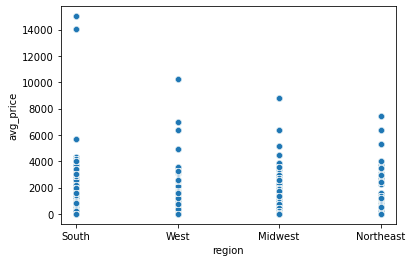

In [80]:
region_avg_price = sns.scatterplot(x = 'region', y = 'avg_price',data = ords_prods_cust_merge)

In [81]:
# Comparing regions & average prrice - the south has the highest average price

In [ ]:
# export
region_avg_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_avg_price.png'))

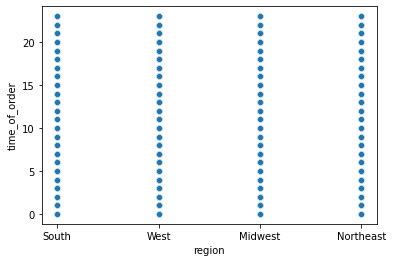

In [83]:
region_time_of_order = sns.scatterplot(x = 'region', y = 'time_of_order',data = ords_prods_cust_merge)

In [84]:
# comparing regions and time_of_order - nothing is standing out

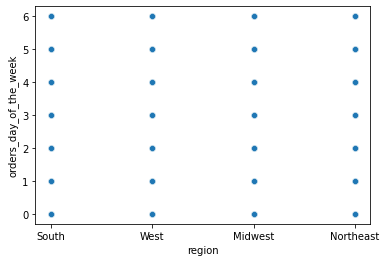

In [85]:
region_day_of_week = sns.scatterplot(x = 'region', y = 'orders_day_of_the_week',data = ords_prods_cust_merge)

In [86]:
# comparing region and orders_day_of_the_week - nothing is standing out

In [87]:
# products frequency

In [88]:
prods_freq = ords_prods_cust_merge.groupby('product_name').agg({'add_to_cart_order': ['sum']})

In [89]:
prods_freq

,add_to_cart_order
,sum
product_name,
#2 Coffee Filters,6948
#2 Cone White Coffee Filters,96
#2 Mechanical Pencils,62
#4 Natural Brown Coffee Filters,2430
#NAME?,191
...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,171
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,473


In [90]:
prods_freq.to_clipboard()

In [91]:
# department frequency

In [92]:
dept_freq = ords_prods_cust_merge.groupby('department_name').agg({'add_to_cart_order': ['sum']})

In [93]:
dept_freq

,add_to_cart_order
,sum
department_name,
Alcohol,787433
Babies,4341083
Bakery,9079169
Beverages,17973374
Breakfast,6134484
Bulk,280800
Canned Goods,10089479
Dairy Eggs,38851163


In [94]:
dept_freq.to_clipboard()

In [95]:
price_per_day = ords_prods_cust_merge.groupby('day_of_week').agg({'prices': ['mean']})

In [96]:
price_per_day.sort_index()

,prices
,mean
day_of_week,
Friday,7.857788
Monday,7.754530
Saturday,7.857898
Sunday,7.757879
Thursday,7.761342
Tuesday,7.757220
Wednesday,7.756521


In [97]:
price_per_day.to_clipboard()

In [98]:
price_per_hour = ords_prods_cust_merge.groupby('time_of_order').agg({'prices': ['mean']})

In [99]:
price_per_hour.sort_index()

,prices
,mean
time_of_order,
0,7.811935
1,7.806720
2,7.803857
3,7.829993
4,7.842191
5,7.831289
6,7.819828
7,7.821447


In [100]:
price_per_hour.to_clipboard()

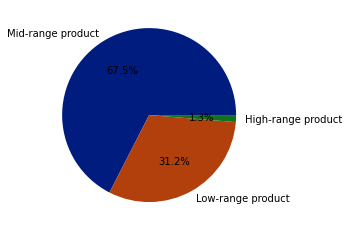

In [101]:
price_range_pie = ords_prods_cust_merge['price_range_loc'].value_counts().plot.pie(autopct = '%1.1f%%', colors = sns.color_palette('dark',3)), plt.ylabel('')

In [102]:
# SAVE AS PNG FILE

In [103]:
ords_prods_cust_merge['price_range_loc'].value_counts(dropna = False)

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range_loc, dtype: int64

In [104]:
price_range_sum = ords_prods_cust_merge.groupby('price_range_loc').agg({'prices' : ['sum']})

In [105]:
price_range_sum

,prices
,sum
price_range_loc,
High-range product,8102771.4
Low-range product,29255100.1
Mid-range product,203836364.1


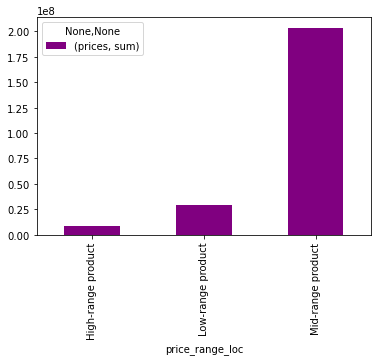

In [106]:
bar_price_range_sum = price_range_sum.plot.bar(color = 'purple')

In [107]:
bar_price_range_sum.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range_sum.png'))

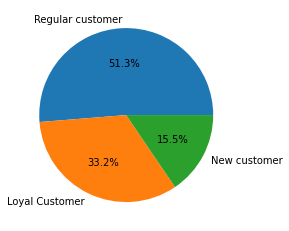

In [115]:
loyalty_pie = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.pie(autopct = '%1.1f%%'),plt.ylabel('')

In [116]:
#Creating crosstab of 'frequency_flag' and 'loyalty_flag

In [117]:
loyalty_and_frequency = pd.crosstab(ords_prods_cust_merge['frequency_flag'], ords_prods_cust_merge['loyalty_flag'], dropna = False)

In [118]:
loyalty_and_frequency

loyalty_flag,Loyal Customer,New customer,Regular customer
frequency_flag,,,
Frequent customer,10279636,1018332,9012665
Non-frequent customer,0,2415913,1242184
Regular customer,4457,1369450,5621927


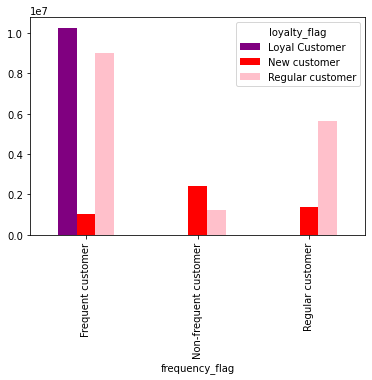

In [119]:
loyalty_and_frequency = loyalty_and_frequency.plot.bar(color =['purple', 'red', 'pink'])

In [120]:
bar_loyalty_and_frequency = loyalty_and_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_and_frequency.png'))

In [121]:
loyalty_age = pd.crosstab(ords_prods_cust_merge['loyalty_flag'], ords_prods_cust_merge['generation'], dropna = False)

In [122]:
loyalty_age

generation,"Boomers I, 67-76","Boomers II, 58-67","Gen-X, 42-57","Gen-Z, 18-25","Millenial, 25-41","Post War, 76-95=4","WWII, 95+"
loyalty_flag,,,,,,,
Loyal Customer,1457490,1405915,2620919,1128089,2545829,810734,315117
New customer,675681,673296,1213873,523093,1190139,376004,151609
Regular customer,2234474,2172311,3995009,1734879,3999216,1249314,491573


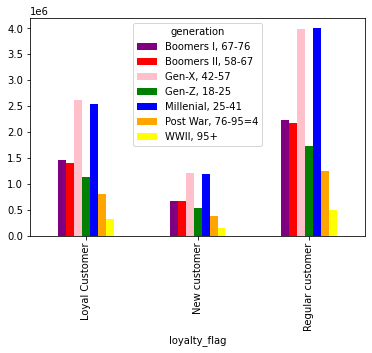

In [123]:
bar_loyalty_age = loyalty_age.plot.bar(color =['purple', 'red', 'pink', 'green', 'blue', 'orange', 'yellow'])

In [124]:
bar_loyalty_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_age.png'))

In [125]:
region_and_freqency = pd.crosstab(ords_prods_cust_merge['region'], ords_prods_cust_merge['frequency_flag'], dropna = False)

In [126]:
region_and_freqency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,3942637,721519,1386726
Northeast,3588160,636664,1239861
South,6775055,1217800,2318284
West,6004781,1082114,2050963


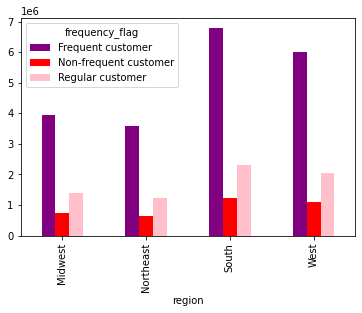

In [127]:
bar_region_freq = region_and_freqency.plot.bar(color =['purple', 'red', 'pink'])

In [128]:
bar_region_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_frequency.png'))

In [129]:
age_frequency = pd.crosstab(ords_prods_cust_merge['generation'], ords_prods_cust_merge['frequency_flag'], dropna = False)

In [130]:
age_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
generation,,,
"Boomers I, 67-76",2895721,505783,966141
"Boomers II, 58-67",2770451,517635,963436
"Gen-X, 42-57",5123881,930311,1775609
"Gen-Z, 18-25",2234308,395706,756047
"Millenial, 25-41",5066063,905302,1763819
"Post War, 76-95=4",1594057,288543,553452
"WWII, 95+",626152,114817,217330


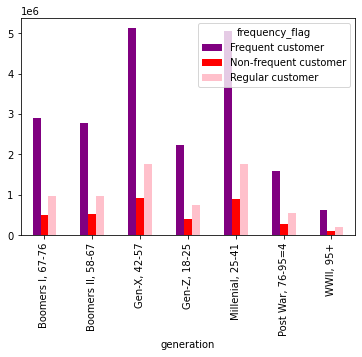

In [131]:
bar_age_freq = age_frequency.plot.bar(color =['purple', 'red', 'pink', 'green', 'blue', 'orange', 'yellow'])

In [132]:
bar_age_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_freq.png'))

In [133]:
family_status_and_frequency = pd.crosstab(ords_prods_cust_merge['parent_status'], ords_prods_cust_merge['frequency_flag'], dropna = False)

In [134]:
family_status_and_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
parent_status,,,
Non-parent,5066668,911002,1762011
Parent,15243965,2747095,5233823


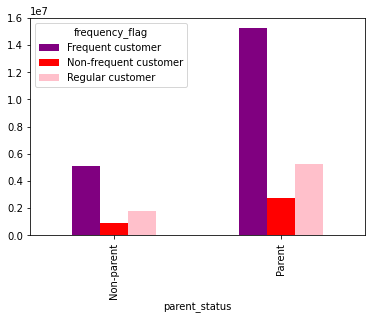

In [135]:
bar_fam_status_freq = family_status_and_frequency.plot.bar(color =['purple', 'red', 'pink'])

In [136]:
bar_fam_status_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_status_freq.png'))

In [137]:
sales_by_age = ords_prods_cust_merge.groupby('generation').agg({'prices' : ['sum']})

In [138]:
sales_by_age

,prices
,sum
generation,
"Boomers I, 67-76",34036543.8
"Boomers II, 58-67",33154470.8
"Gen-X, 42-57",60986546.6
"Gen-Z, 18-25",26345820.0
"Millenial, 25-41",60218562.0
"Post War, 76-95=4",18975103.1
"WWII, 95+",7477189.3


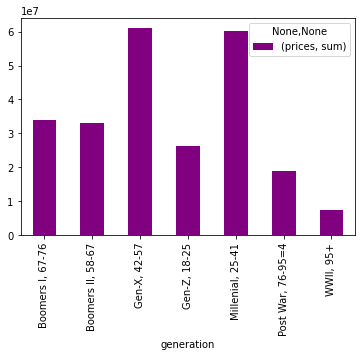

In [139]:
bar_sales_by_age = sales_by_age.plot.bar(color =['purple', 'red', 'pink'])

In [140]:
bar_sales_by_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_by_age.png'))

In [141]:
sales_by_region = ords_prods_cust_merge.groupby('region').agg({'prices' : ['sum']})

In [142]:
sales_by_region

,prices
,sum
region,
Midwest,47133061.5
Northeast,42516874.7
South,80356321.2
West,71187978.2


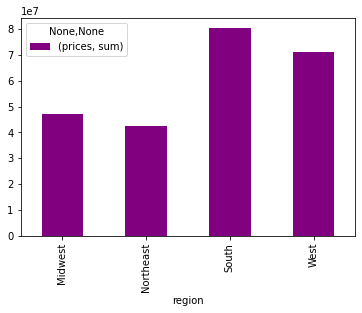

In [143]:
bar_sales_by_region = sales_by_region.plot.bar(color =['purple', 'red', 'pink'])

In [144]:
bar_sales_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_by_region.png'))

In [145]:
sales_by_income = ords_prods_cust_merge.groupby('economic_class').agg({'prices' : ['sum']})

In [146]:
sales_by_income

,prices
,sum
economic_class,
"Lower, less than $52200",24984623.8
Middle,194557532.3
"Upper, more than $156k",21652079.5


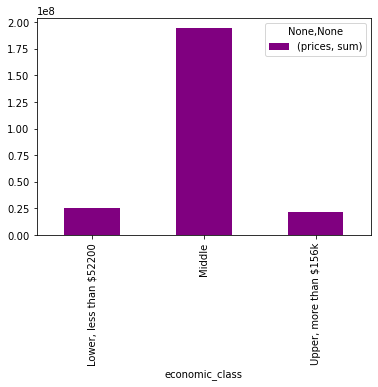

In [147]:
bar_sales_by_income = sales_by_income.plot.bar(color =['purple', 'red', 'pink'])

In [148]:
bar_sales_by_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_by_income.png'))

In [149]:
sales_by_family_status = ords_prods_cust_merge.groupby('parent_status').agg({'prices' : ['sum']})

In [150]:
sales_by_family_status

,prices
,sum
parent_status,
Non-parent,60279492.7
Parent,180914742.9


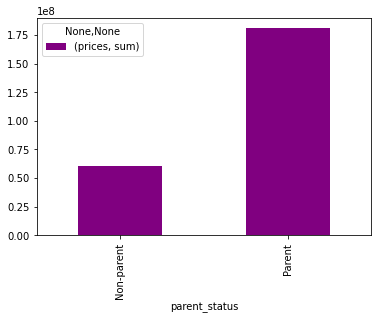

In [151]:
bar_fam_status_price = sales_by_family_status.plot.bar(color =['purple', 'red', 'pink'])

In [152]:
bar_fam_status_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_status_price.png'))

In [153]:
generation_order_time = ords_prods_cust_merge.groupby('generation').agg({'time_of_order' : ['mean']})

In [154]:
generation_order_time

,time_of_order
,mean
generation,
"Boomers I, 67-76",13.401660
"Boomers II, 58-67",13.418385
"Gen-X, 42-57",13.426925
"Gen-Z, 18-25",13.392835
"Millenial, 25-41",13.404279
"Post War, 76-95=4",13.426392
"WWII, 95+",13.369395


In [155]:
age_spend_habit_day = pd.crosstab(ords_prods_cust_merge['day_of_week'], ords_prods_cust_merge['generation'], dropna = False)

In [157]:
age_spend_habit_day

generation,"Boomers I, 67-76","Boomers II, 58-67","Gen-X, 42-57","Gen-Z, 18-25","Millenial, 25-41","Post War, 76-95=4","WWII, 95+"
day_of_week,,,,,,,
Friday,609590,586164,1089754,469060,1056898,342932,136906
Monday,569216,555738,1027931,437727,999130,313031,121933
Saturday,833888,808070,1486021,643003,1486000,466767,184861
Sunday,751876,743393,1364160,592680,1364607,424952,170018
Thursday,568686,552350,1020369,444751,1005816,318890,122867
Tuesday,522793,507239,924849,401067,913125,288535,111927
Wednesday,511596,498568,916717,397773,909608,280945,109787


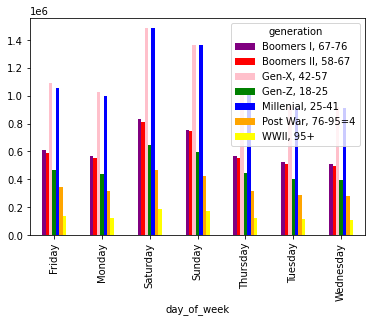

In [158]:
bar_age_spend_habit = age_spend_habit_day.plot.bar(color =['purple', 'red', 'pink', 'green', 'blue', 'orange', 'yellow'])

In [159]:
bar_age_spend_habit.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_spend_habit.png'))

In [160]:
age_spend_habit_hour = pd.crosstab(ords_prods_cust_merge['time_of_order'], ords_prods_cust_merge['generation'], dropna = False)

In [161]:
age_spend_habit_hour

generation,"Boomers I, 67-76","Boomers II, 58-67","Gen-X, 42-57","Gen-Z, 18-25","Millenial, 25-41","Post War, 76-95=4","WWII, 95+"
time_of_order,,,,,,,
0,27419,28373,52253,23305,53812,16196,6684
1,14365,14795,27504,12351,28200,8936,3470
2,9414,8571,15696,7678,16732,5430,2170
3,6784,6402,11475,5350,12603,4458,1724
4,7064,7971,11742,5831,12397,4050,1708
5,12765,12252,20277,9254,20541,6224,3105
6,39149,37439,69025,32655,69172,23109,10464
7,123928,118432,215919,94426,213176,69784,27548
8,236522,226896,420796,177528,414447,130987,51934


In [183]:
age_spend_habit_hour.to_clipboard()

In [162]:
parent_status_spend_day = pd.crosstab(ords_prods_cust_merge['day_of_week'], ords_prods_cust_merge['parent_status'], dropna = False)

In [163]:
parent_status_spend_day

parent_status,Non-parent,Parent
day_of_week,,
Friday,1061197,3230107
Monday,1002581,3022125
Saturday,1477078,4431532
Sunday,1362350,4049336
Thursday,1014174,3019555
Tuesday,917042,2752493
Wednesday,905259,2719735


In [184]:
parent_status_spend_day.to_clipboard()

In [164]:
age_spend_habit_hour = pd.crosstab(ords_prods_cust_merge['time_of_order'], ords_prods_cust_merge['generation'], dropna = False)

In [165]:
age_spend_habit_hour

generation,"Boomers I, 67-76","Boomers II, 58-67","Gen-X, 42-57","Gen-Z, 18-25","Millenial, 25-41","Post War, 76-95=4","WWII, 95+"
time_of_order,,,,,,,
0,27419,28373,52253,23305,53812,16196,6684
1,14365,14795,27504,12351,28200,8936,3470
2,9414,8571,15696,7678,16732,5430,2170
3,6784,6402,11475,5350,12603,4458,1724
4,7064,7971,11742,5831,12397,4050,1708
5,12765,12252,20277,9254,20541,6224,3105
6,39149,37439,69025,32655,69172,23109,10464
7,123928,118432,215919,94426,213176,69784,27548
8,236522,226896,420796,177528,414447,130987,51934


In [185]:
age_spend_habit_hour.to_clipboard()

In [188]:
region_spend_habit_day = pd.crosstab(ords_prods_cust_merge['day_of_week'], ords_prods_cust_merge['region'], dropna = False)

In [189]:
region_spend_habit_day

region,Midwest,Northeast,South,West
day_of_week,,,,
Friday,843231,750282,1429704,1268087
Monday,788979,713159,1340387,1182181
Saturday,1153265,1043698,1955352,1756295
Sunday,1052316,954332,1808348,1596690
Thursday,792238,716128,1342849,1182514
Tuesday,712543,649305,1229002,1078685
Wednesday,708310,637781,1205497,1073406


In [190]:
region_spend_habit_day.to_clipboard()

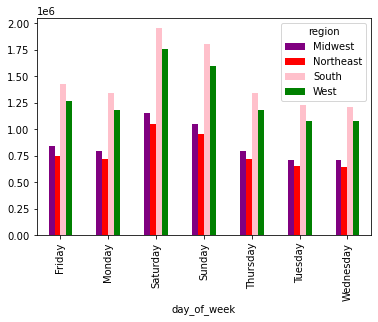

In [168]:
region_spend_habit_day = region_spend_habit_day.plot.bar(color =['purple', 'red', 'pink', 'green', 'blue', 'orange', 'yellow'])

In [169]:
region_spend_habit_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spend_habit_day.png'))

In [170]:
region_spend_habit_hour = pd.crosstab(ords_prods_cust_merge['time_of_order'], ords_prods_cust_merge['region'], dropna = False)

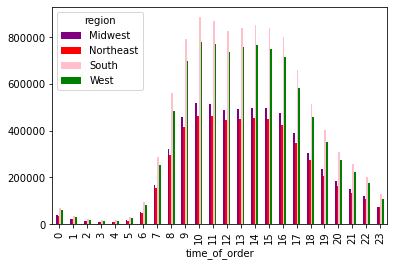

In [171]:
region_spend_habit_hour = region_spend_habit_hour.plot.bar(color =['purple', 'red', 'pink', 'green', 'blue', 'orange', 'yellow'])

In [172]:
region_spend_habit_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spend_habit_hour.png'))

In [173]:
region_department = pd.crosstab(ords_prods_cust_merge['department_name'], ords_prods_cust_merge['region'], dropna = False)

In [174]:
region_department

region,Midwest,Northeast,South,West
department_name,,,,
Alcohol,28812,25017,48813,41985
Babies,80063,72712,139511,118106
Bakery,218321,199300,371620,331587
Beverages,498599,462929,859419,750954
Breakfast,129977,117904,223172,199797
Bulk,6620,5599,11180,10052
Canned Goods,197519,176936,337458,300161
Dairy Eggs,1009320,914616,1723016,1530230
Deli,194490,178398,333620,297326


In [191]:
region_department.to_clipboard()

In [175]:
generation_department = pd.crosstab(ords_prods_cust_merge['department_name'], ords_prods_cust_merge['generation'], dropna = False)

In [176]:
generation_department

generation,"Boomers I, 67-76","Boomers II, 58-67","Gen-X, 42-57","Gen-Z, 18-25","Millenial, 25-41","Post War, 76-95=4","WWII, 95+"
department_name,,,,,,,
Alcohol,20358,19162,36174,16129,36652,10685,5467
Babies,57248,55916,105864,44420,102752,31145,13047
Bakery,156512,154164,285218,122266,278963,88787,34918
Beverages,368514,355703,655472,280201,633182,201140,77689
Breakfast,93442,91481,171130,74887,166483,52635,20792
Bulk,4861,4390,8414,3773,8348,2637,1028
Canned Goods,141200,139669,255721,110774,254387,79397,30926
Dairy Eggs,734408,705618,1306012,567387,1301457,403227,159073
Deli,141523,138791,252507,109048,251812,79018,31135


In [192]:
generation_department.to_clipboard()

In [177]:
gen_parent_status = pd.crosstab(ords_prods_cust_merge['generation'], ords_prods_cust_merge['parent_status'], dropna = False)

In [178]:
gen_parent_status

parent_status,Non-parent,Parent
generation,,
"Boomers I, 67-76",1062180,3305465
"Boomers II, 58-67",1099855,3151667
"Gen-X, 42-57",1932484,5897317
"Gen-Z, 18-25",833972,2552089
"Millenial, 25-41",1947192,5787992
"Post War, 76-95=4",612107,1823945
"WWII, 95+",251891,706408


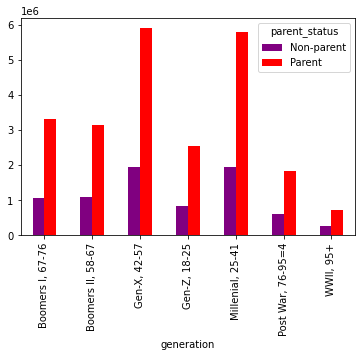

In [180]:
bar_gen_parent_status = gen_parent_status.plot.bar(color =['purple', 'red', 'pink', 'green', 'blue', 'orange', 'yellow'])

In [181]:
bar_gen_parent_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_gen_parent_status.png'))

In [182]:
ords_prods_cust_merge.groupby('generation').agg({'prices' : ['mean', 'min', 'max']})

prices           
                       mean  min   max
generation                            
Boomers I, 67-76   7.794067  1.0  25.0
Boomers II, 58-67  7.799547  1.0  25.0
Gen-X, 42-57       7.790284  1.0  25.0
Gen-Z, 18-25       7.782004  1.0  25.0
Millenial, 25-41   7.786186  1.0  25.0
Post War, 76-95=4  7.790535  1.0  25.0
WWII, 95+          7.803541  1.0  25.0

In [193]:
ords_prods_cust_merge.to_pickle(os.path.join(path, '02 Data','Prepped Data', 'ords_prods_cust_merged2.pkl'))